<IPython.core.display.Javascript object>


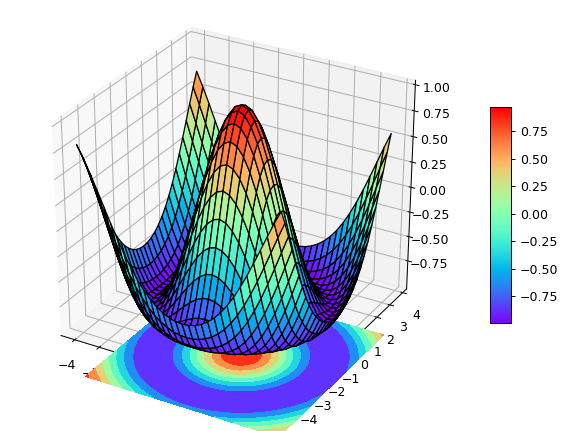

x =  (32,)
y =  (32, 32)
x =  (32, 32) 
 [[-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 ...
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]]
z =  (32, 32)


In [47]:
#%matplotlib auto
import pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x = np.arange(-4,4,0.25)
print("x = ",x.shape)
y = np.arange(-4,4,0.25)
x,y = np.meshgrid(x,y)
print("y = ",y.shape)
print("x = ",x.shape,"\n",x)

z = np.cos(np.sqrt(x**2+y**2))
print("z = ",z.shape)

surf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap="rainbow",edgecolor="black")
ax.contourf(x,y,z,zdir="z",offset=-1.5,cmap='rainbow')
#ax.plot_wireframe(x,y,z,rstride=1,cstride=1,color='b')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

<IPython.core.display.Javascript object>


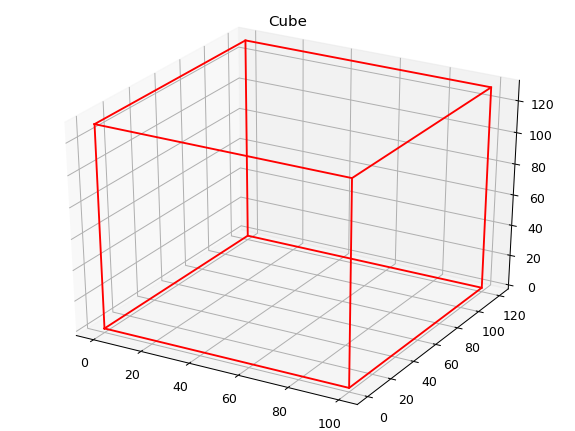

<IPython.core.display.Javascript object>


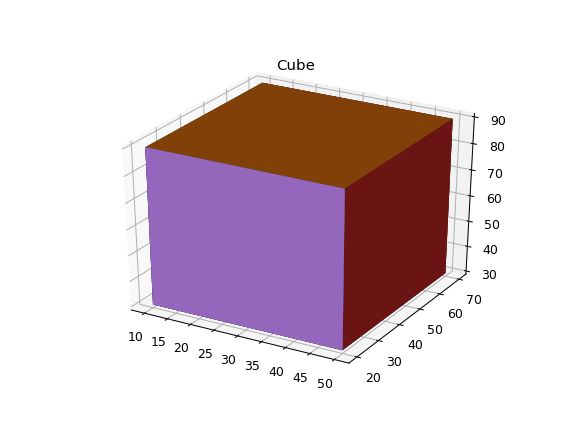

In [50]:
#先画上下两个面的线框，再画四根柱
def plot_linear_cube(x, y, z, dx, dy, dz, color='red'):
    fig = plt.figure()
    ax = Axes3D(fig)
    xx = [x, x, x+dx, x+dx, x]
    yy = [y, y+dy, y+dy, y, y]
    kwargs = {'alpha': 1, 'color': color}
    ax.plot3D(xx, yy, [z]*5, **kwargs)
    ax.plot3D(xx, yy, [z+dz]*5, **kwargs)
    ax.plot3D([x, x], [y, y], [z, z+dz], **kwargs)
    ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], **kwargs)
    plt.title('Cube')
    plt.show()

#画六个面
def plot_opaque_cube(x=10, y=20, z=30, dx=40, dy=50, dz=60):
    fig = plt.figure()
    ax = plt.subplot(1,1,1,projection='3d')          #plt.subplot = fig.add_subplot
    #ax = fig.add_subplot(1, 1, 1, projection='3d')  #类似Axes3D

    xx = np.linspace(x, x+dx, 2)
    yy = np.linspace(y, y+dy, 2)
    zz = np.linspace(z, z+dz, 2)

    xx, yy = np.meshgrid(xx, yy)
    args = {"shape":xx.shape,"dtype":xx.dtype}
    ax.plot_surface(xx, yy, np.ones(**args)*z)
    ax.plot_surface(xx, yy, np.ones(**args)*(z+dz))

    yy, zz = np.meshgrid(yy, zz)
    args = {"shape":yy.shape,"dtype":yy.dtype}
    ax.plot_surface(np.ones(**args)*x,      yy, zz)
    ax.plot_surface(np.ones(**args)*(x+dx), yy, zz)

    xx, zz = np.meshgrid(xx, zz)
    args = {"shape":xx.shape,"dtype":xx.dtype}
    ax.plot_surface(xx, np.ones(**args)*y,      zz)
    ax.plot_surface(xx, np.ones(**args)*(y+dy), zz)

    plt.title("Cube")
    plt.show()

%matplotlib notebook
plot_linear_cube(0, 0, 0, 100, 120, 130)
plot_opaque_cube()